# Baseline model

**Rossmann Store Sales**
Forecast sales using store, promotion, and competitor data

This is a Kaggle competition and can be found [here](https://www.kaggle.com/competitions/rossmann-store-sales/overview)

In this notebook I use a `linear regression` to predict `Sales`.

The validation RMSE is `1387`

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# my functions
from utils import RMSPE
from pipeline_1 import full_pipeline

# Load data

In [2]:
# Load the dataset
def load_ds(path: Path, filename: str) -> pd.DataFrame:
    """Read the dataset csv file as a pandas dataframe."""
    return pd.read_csv(path / filename)

# Load dataset
dataset_path = Path().absolute() / "data"
filename = "X_y_train.csv"
X_y_train = load_ds(dataset_path, filename)

print(f"Shape: {X_y_train.shape}")

Shape: (675470, 18)


In [3]:
X_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675470 entries, 0 to 675469
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      675470 non-null  int64  
 1   DayOfWeek                  675470 non-null  int64  
 2   Date                       675470 non-null  object 
 3   Sales                      675470 non-null  int64  
 4   Customers                  675470 non-null  int64  
 5   Open                       675470 non-null  int64  
 6   Promo                      675470 non-null  int64  
 7   StateHoliday               675470 non-null  object 
 8   SchoolHoliday              675470 non-null  int64  
 9   StoreType                  675470 non-null  object 
 10  Assortment                 675470 non-null  object 
 11  CompetitionDistance        673738 non-null  float64
 12  CompetitionOpenSinceMonth  460686 non-null  float64
 13  CompetitionOpenSinceYear   46

In [4]:
X_train = X_y_train # include "Sales", CombinedAttributesAdder() drops it
y_train = X_y_train.loc[:, "Sales"].copy()

# Linear regression

In [5]:
lm = Pipeline([
    # Pre-processing pipeline
    ("preparation", full_pipeline),
    # Random forest
    ("lm", LinearRegression())])

In [6]:
lm.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('attribs_adder', CombinedAttributesAdder()),
                                 ('cols_transformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['SchoolHoliday',
                                                                    'Promo2',
                                                                    'Month_mean',
                                                                    'Store_mean',
                                                                    'DayOfWeek_mean',
                                                                    'PromoStore_mean',
                                                                    'CD_clip_bins_clip']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one_hot',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['StoreType',
                                                                    'Assortment'])]))])),
                ('lm', LinearRegression())])

In [7]:
lm.score(X_train, y_train)

0.8019032738963003

In [8]:
y_pred = lm.predict(X_train)

In [9]:
mean_squared_error(y_train, y_pred, squared=False)

1381.7308183891257

In [10]:
np.sqrt(np.sum((y_train -y_pred)**2) / len(y_train))

1381.7308183891257

In [11]:
RMSPE(y_train, y_pred)

0.28733725742299115

The Root Mean Square Percentage Error on the train set is:

`RMSPE = 0.29`

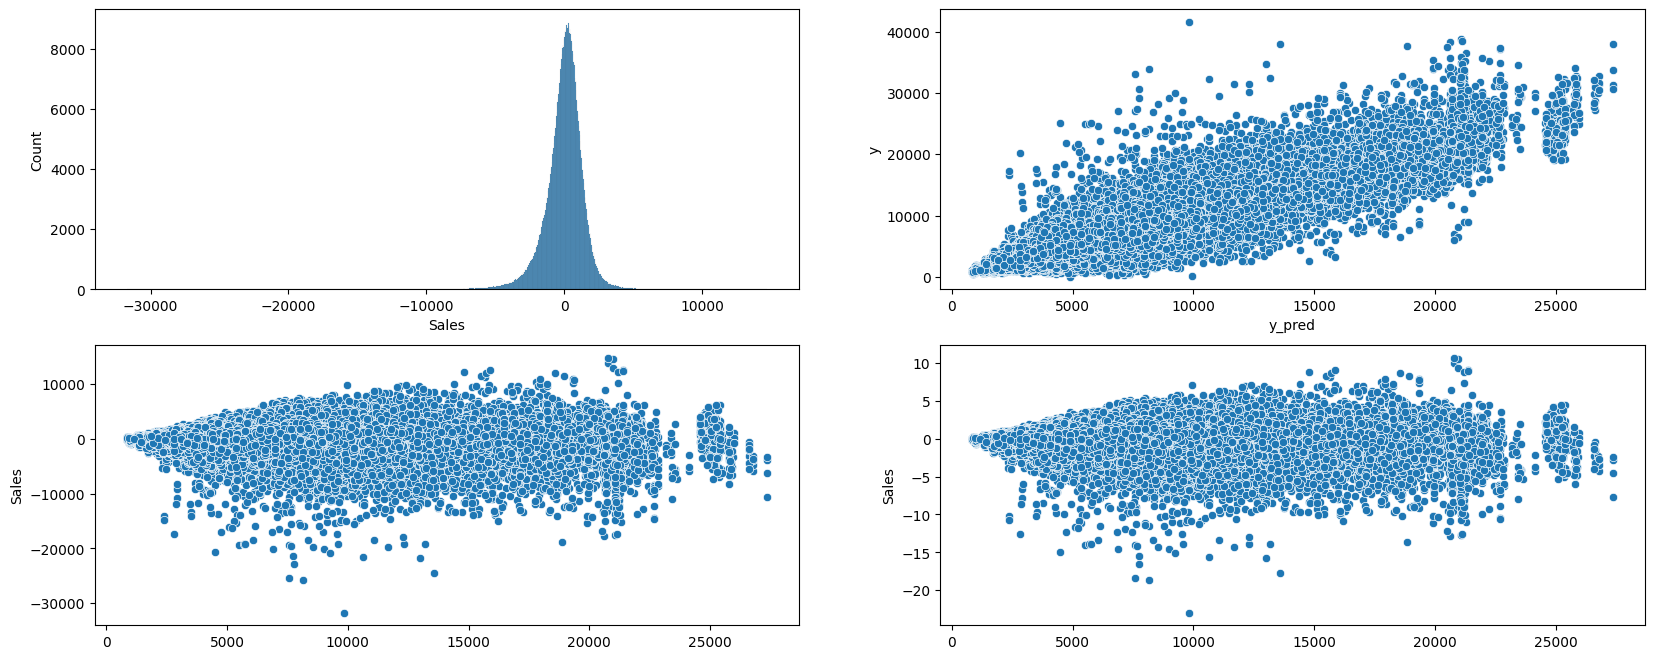

In [12]:
res = (y_pred - y_train)
res_normed = (res - np.mean(res))/np.std(res)


plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
sns.histplot(x=res)

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=y_train)
plt.xlabel("y_pred")
plt.ylabel("y")

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=res)

plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred, y=res_normed)

plt.show()

# Cross validation

In [13]:
cv_lm = Pipeline([
    # Pre-processing pipeline
    ("preparation", full_pipeline),
    # Random forest
    ("lm", LinearRegression())])

In [14]:
cv_scores = cross_val_score(
    cv_lm,
    X_train,
    y_train,
    scoring='neg_root_mean_squared_error',
    cv=5)

In [15]:
cv_scores

array([-1387.24847996, -1378.87647291, -1392.85478315, -1390.71902679,
       -1383.28091274])

In [16]:
cv_scores.mean() * -1

1386.5959351090125

Mean cross validadtion score is `1387`